# `hotAD`

A Python package for forward mode automatic differentiation for multivariate functions, Jacobian/Hessian matrix computation, root-finding, and optimization routines.

<hr>

# 1. Introduction

Classically, scientists have used symbolic differentiation and finite difference method to compute derivatives of functions, but these approaches face issues of increasing errors and increasing time cost in evaluating the derivatives as dimensions and complexities of the function go up. Automatic differentiation (AD) applies the chain rule - a rudimentary differentiation technique - over and over on a series of elementary arithmetic operations that make up any function. As the order increases, the complexity of AD calculation is not worse than the original function, therefore achieving efficiency.

Our Python package employs the forward mode of AD to evaluate the first and second derivatives of functions. Users are welcome to use our forward mode AD module and accompanying the elementary functions module for their own applications or to take advantage of our even more user-friendly Jacobian-calculating and optimization module.

# 2. How to use the package

Users can install the package in one of two ways:
* **[Pip](https://pypi.org/project/hotAD/?fbclid=IwAR2zgoybP2w9GoLlzv-SsfegraY5ODgdgABdEPeHnwgVLrUnmN-zhlMhiS8)**: `pip install hotAD`
* **[Download source code](https://github.com/CS207ProjectGroup8/cs207-FinalProject/tree/master/hotAD/hotAD)**: Find the code under `hotAD/hotAD` and the requirements to install in the `requirements.txt` file in the main repository.

Once in a Python script or a Jupyter notebook, we suggest importing the three modules as follows:

In [1]:
from hotAD.AutoDiffObject import AutoDiff
from hotAD.ElementaryFunctions import ElementaryFunctions as ef
from hotAD import ADfun as adf

**Note**: `ADfun` must be imported after `ElementaryFunctions`.

Once in a Python interpreter, users can instantiate `AutoDiff` objects for variables that they wish to differentiate. These objects can be instantiate by calling `AutoDiff(2, 'x', H=True)`, where the first argument is the value of the variable the user wishes to evaluate, the second argument is a one character string denoting the variable name (to be returned for the first and second derivatives), and an optional argument `H` to specifcy whether or not they would like to compute the second derivative.

In [2]:
x = AutoDiff(3, 'x', H=True)  
y = AutoDiff(4, 'y', H=True)   

After creating the `AutoDiff` objects, users can combine these variables into functions using basic operators like `+`, `-`, `*`, and `/` and elementary functions from our module. The elementary functions we currently have implemented are:
* trigonometric functions (`sin`, `cos`, `tan`, `arcsin`, `arccos`, `arctan`)
* power functions (`power`, `sqrt`)
* exponential functions (`log`, `exp`)
* logistic function (`logit`)



In [3]:
f = ef.sin(x)
g = ef.power(x, y)
h = ef.sqrt(x*x*y*y)

In [4]:
print("sin(x) evaluated at x=3")
print('Value:', f.val, '\nFirst derivative:', f.der, '\nSecond derivative:', f.der2)
print("\nx^y evaluated at x=3 and y=4")
print('Value:', g.val, '\nFirst derivative:', g.der, '\nSecond derivative:', g.der2)
print("\nsqrt(x^2 * y^2) evaluated at x=3 and y=4")
print('Value:', h.val, '\nFirst derivative:', h.der, '\nSecond derivative:', g.der2)

sin(x) evaluated at x=3
Value: 0.1411200080598672 
First derivative: {'x': -0.9899924966004454} 
Second derivative: {'x': -0.1411200080598672}

x^y evaluated at x=3 and y=4
Value: 81 
First derivative: {'x': 108.0, 'y': 88.9875953821169} 
Second derivative: {'x': 108.0, 'xy': 145.65012717615585, 'yx': 145.65012717615585, 'y': 97.76286582581915}

sqrt(x^2 * y^2) evaluated at x=3 and y=4
Value: 12.0 
First derivative: {'x': 4.0, 'y': 3.0} 
Second derivative: {'x': 108.0, 'xy': 145.65012717615585, 'yx': 145.65012717615585, 'y': 97.76286582581915}


Users can also inspect how the function values and derivatives behave over an interval by iterating through a list or array of values and repeating the steps above.

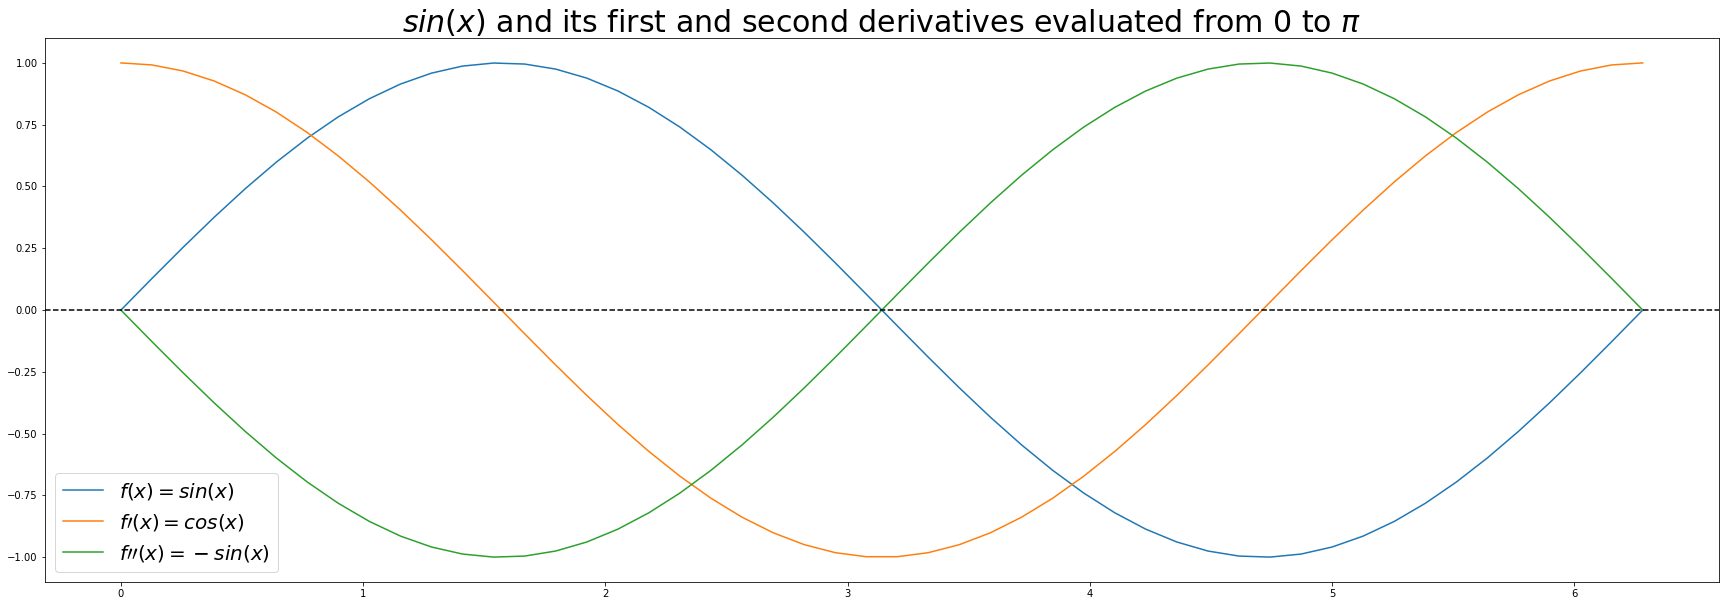

In [5]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

fun_vals = []
der_vals = []
der2_vals = []
for i in np.linspace(0, 2*np.pi):
    x = AutoDiff(i, "x", H=True)
    f = ef.sin(x)
    fun_vals.append(f.val)
    der_vals.append(f.der["x"])
    der2_vals.append(f.der2["x"])
    
plt.figure(figsize=(30,10))
plt.plot(np.linspace(0, 2*np.pi), fun_vals, label=r"$f(x) = sin(x)$")
plt.plot(np.linspace(0, 2*np.pi), der_vals, label=r"$f\prime(x) = cos(x)$")
plt.plot(np.linspace(0, 2*np.pi), der2_vals, label=r"$f\prime\prime(x) = -sin(x)$")
plt.axhline(0,color='black',linestyle='--')
plt.legend(fontsize=20)
plt.title(r'$sin(x)$ and its first and second derivatives evaluated from 0 to $\pi$', fontsize=30)
plt.show()

In `ADfun`, users can 
* compute the Jacobian matrix of a function
* perform root-finding via Newton's Method
* and to perform minimization via `newton`, `quasi-newton-BFGS`, and `gradient-descent` methods

## J_F

This function can be used to evaluate a function and the Jacobian (and Hessian, if applicable) matrix of that function at a specific point. This function takes three arguments:
* a function that takes in points as a list of length $m$ and outputs a list of length $n$
* a list of length $m$ of points
* `H`, an optional argument specifying whether or not to compute the Hessian matrix
    * True: F needs to be a one-vector function, and the Hessian matrix of F will be calculated as well
    * False: No restriction on F, no second derivative information will be outputted

*Jacobian* ($f: \mathbb{R}^m \rightarrow \mathbb{R}^n$)

In [6]:
def A(x): 
    return [x[0]*3 + x[1]*x[2], x[2]-x[0]*x[1]+x[0]]

In [7]:
output = adf.J_F(A, [2,3,4])
print('A evaluated at (2,3,4):', output[0])
print('Jacobian matrix of A evaluated at (2,3,4):', output[1])

A evaluated at (2,3,4,8): [82.]
Jacobian matrix of A evaluated at (2,3,4,8): [[ 3.  4.  3. 16.]]
Hessian matrix of A evaluated at (2,3,4,8): [[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 2.]]


*Jacobian and Hessian* ($ f: \mathbb{R}^m \rightarrow \mathbb{R}$)

In [8]:
def B(x):
    return [x[0]*3 + x[1]*x[2] + x[3]*x[3]]

In [9]:
out = adf.J_F(B, [2,3,4,8], H=True)
print('B evaluated at (2,3,4,8):', out[0])
print('Jacobian matrix of B evaluated at (2,3,4,8):', out[1])
print('Hessian matrix of B evaluated at (2,3,4,8):', out[2])

B evaluated at (2,3,4): [18.  0.]
Jacobian matrix of B evaluated at (2,3,4): [[ 3.  4.  3.]
 [-2. -2.  1.]]


## Newton

Consider the following two-vector function: 

$f_1(x, y) = x^2 + 4\cdot y + sin(x) \cdot tan(y)$

$f_2(x, y) = y + \frac{xy}{sin(x)}$

We want to find a root $(x_0, y_0)$ of this system of equations, such that $f_1(x_0, y_0) = 0$ and $f_2(x_0, y_0) = 0$.

In [ ]:
def F(x):
    F_1 = x[0] * x[0] +4 * x[1] + ef.sin(x[0])* ef.tan(x[1])
    F_2 = x[1] + x[0]*x[1] / ef.sin(x[0])
    return [F_1, F_2]

In [ ]:
adf.Newton(F, [3,2])

## Mini

This minimization function works for both the univariate and bivariate function case. The arguments to the function `Mini` are:
* function
* initial guess
* plot - when True, the iteration steps of the method to get to the solution are visualized

*Univariate*

Consider the following function: 

$f(x) = x^2 + 2$

In [11]:
def D(x):
    return [x[0]*x[0] + 2]

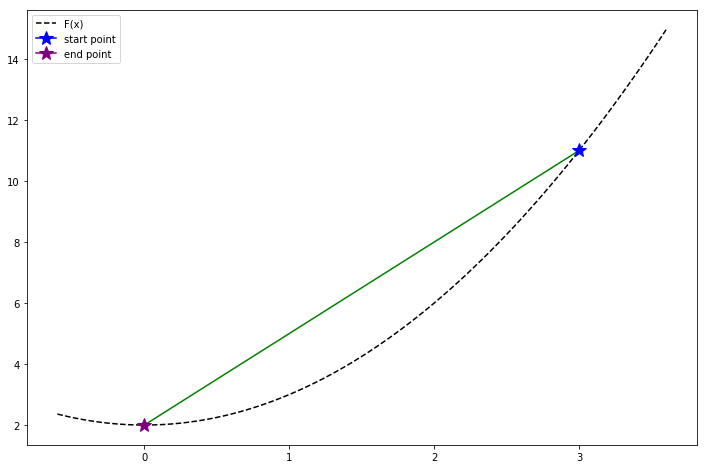

In [21]:
newton_result1 = adf.Mini(D, [3], method = "newton", plot = True)

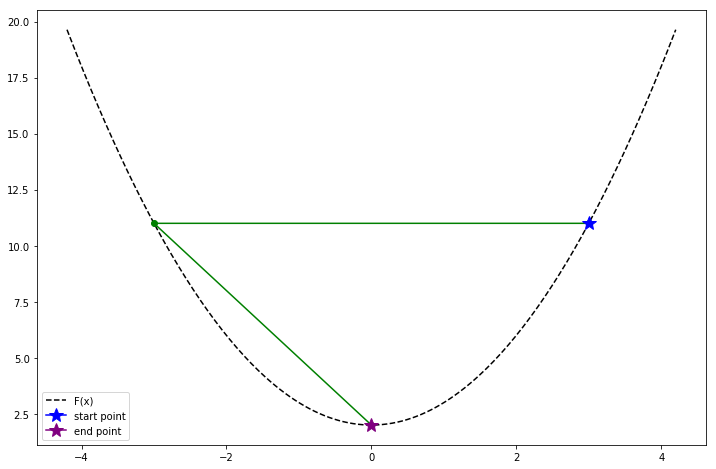

In [22]:
bfgs_result1 = adf.Mini(D, [3], method = "quasi-newton-BFGS", plot = True)

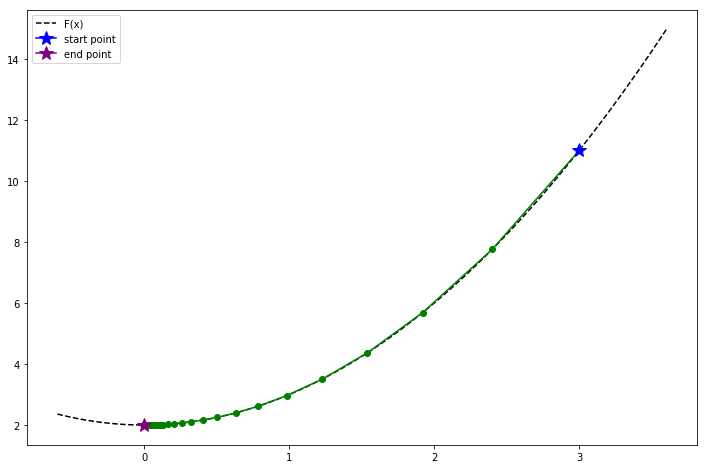

In [23]:
gd_result1 = adf.Mini(D, [3], method = "gradient-descent", rate = 0.1, plot = True)

In [40]:
print("---------------------------------------Result Comparison------------------------------------")
print("   Items       |          BGFS          |           Newton         |        Gradient-Descent   ")
print("   x_min       |         {}           |           {}           |        {}      ".format(bfgs_result1['x_min'], newton_result1['x_min'], gd_result1['x_min']))
print("   G(x_min)    | {}                    |            {}           |       {}   ".format(bfgs_result1['min F(x)'][0], newton_result1['min F(x)'][0], gd_result1['min F(x)'][0]))
print("   # iterations|           {}            |             {}            |                {}    ".format(bfgs_result1['number of iter'], newton_result1['number of iter'], gd_result1['number of iter']))


---------------------------------------Result Comparison------------------------------------
   Items       |          BGFS          |           Newton         |        Gradient-Descent   
   x_min       |         [0.]           |           [0.]           |        [3.39234636e-08]      
   G(x_min)    | 2.0                    |            2.0           |       2.0000000000000013   
   # iterations|           2            |             2            |                82    


*Bivariate*

Consider the following function: 

$f(x, y) = 100 (y-x^2)^2 + (1-x)^2$

We can use our optimization methods to find the minimum of $f(x, y)$.

In [ ]:
def G(x):
    return [100*ef.power((x[1]-x[0]*x[0]),2) + ef.power((1-x[0]),2)]

Now, try our default quasi-Newton BFGS optimization method: 

In [ ]:
BGFS_result = adf.Mini(G, [1, 0.5], plot = True)

Now, we can try the newton's method for optimization: 

In [ ]:
newton_result = adf.Mini(G, [-1, -1], method = "newton", plot = True)

Lastly, we can try "gradient-descent":

In [ ]:
gd_result = adf.Mini(G, [1, 0.9], method = "gradient-descent", plot = True)

In [ ]:
print("---------------------------------------Result Comparison------------------------------------")
print("   Items       |          BGFS          |           Newton         |        Gradient-Descent   ")
print("   x_min       |         {}        |           {}        |    {}    ".format(BGFS_result['x_min'], newton_result['x_min'], gd_result['x_min']))
print("   G(x_min)    | {} |            {}           |      {}   ".format(BGFS_result['min F(x)'][0], newton_result['min F(x)'][0], gd_result['min F(x)'][0]))
print("   # iterations|           {}           |             {}            |             {}    ".format(BGFS_result['number of iter'], newton_result['number of iter'], gd_result['number of iter']))

**Additional note**: If attempting to use our package in a virtual environment (namely `virtualenv`), please follow these additional instructions when attempting to use `ADfun` so that the plots are displayed correctly:

*From the command line*:
1. `$ cd ~/.matplotlib`
2. `$ nano matplotlibrc`
3. Add `backend: TkAgg` to `matplotlibrc`

*From the Python interpreter*:
* `import matplotlib.pyplot as plt` before calling one of the functions from `ADfun`
* `plt.show()` after running the function to view the plot

# 3. Background
Our software deploys the Forward Mode of AD to evaluate the derivatives of functions. Specifically, the software efficiently evaluates at machine precision the Jacobian matrix (a $m\times n$ matrix) of any function $f: R^n \rightarrow R^m$.

**Importance of the Jacobian Matrix**

Evaluating the Jacobian matrix is significant. The Jacobian matrix provides information of (partial) derivatives of the function, which can be used in many different ways. For example, it can be used to linearly approximate the function about the differentiation point, and it can be used to find the function’s extrema and roots. Moreover, Jacobian matrix is critical in a lot of optimization problems across different scientific fields.  

One example of the utilization of Jacobian matrix is the famous Newton’s Method for root finding. The core of the method is that it utilizes evaluation of the Jacobian matrix in each step of its iterations to linearly approximate the given function.

**Importance of High Accuracy and Efficiency**

It is important to evaluate the Jacobian matrix with high accuracy, as small errors could accumulate in higher dimensions and over iterations. It is also important to evaluate the Jacobian matrix efficiently, considering the time cost of the calculation as the complexity and dimension of the function go up.

**Problems with Classical Methods**

Both Symbolic Differentiation and Finite Difference Method face issues of increasing errors and increasing time cost in evaluating the derivatives as dimensions and complexities of the function go up.

**Advantages of the Software (Forward AD)**

Our software, by using Forward AD, can evaluate the Jacobian Matrix of any function $f: R^n \rightarrow R^m$ up to machine precision efficiently. Every function, regardless of its complexity, executes a sequence of elementary arithmetic operations (addition, subtraction, multiplication and division) and elementary functions (sine, cosine, logarithm, etc). Using this fact, AD applies chain rule repeatedly on these operations, and can therefore compute derivatives of any order up to machine precision of the given function. As the order increases, the complexity of AD calculation is not worse than the original function, therefore achieving efficiency. 

# 4. Software organization

# Additional information

This project was completed for Harvard's CS207 in the fall of 2018. Our group members are:
* Yuanheng Wang
* Jiayin Lu
* Lipika Ramaswamy
* Anthony Rentsch